# Fraud Detection Case Study

## Objective
- In this case study, we will explore how data analytics can be applied to detect fraudulent credit card transactions using a simplified dataset.

## Pre-Requisites
- Python Environment: You should have a Python environment set up on your system. If you don't have Python installed, you can download it from the [official Python website](https://www.python.org/downloads/). We recommend downloading Python 3.8 or above.
- Jupyter Notebook: This code is intended to be run in a Jupyter Notebook environment. Make sure you have [Jupyter Notebook installed](https://jupyter.org/install).
- Library Installation: You need to install the required libraries:
    - pandas
    - numpy
    - matplotlib
    - seaborn
    - scikit-learn

To install, run the following commands:
"**!pip3 install pandas numpy matplotlib seaborn scikit-learn**"

In [1]:
# Install the required libraries
!pip3 install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python3.11 -m pip install --upgrade pip


### Business Use Case
Imagine you work for a small bank, and your primary concern is to protect your customers from credit card fraud. Fraudulent transactions can have a significant financial impact on both customers and the bank. We will explore how data analytics can help identify and prevent fraudulent activities.

### Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Load the dataset
We'll use a simplified dataset with 1000 rows and the following columns:

- **TransactionID**: A unique identifier for each transaction.
- **Amount**: The transaction amount.
- **IsFraud**: A binary indicator (1 for fraud, 0 for legitimate transaction).

In [6]:
# Load the dataset
data = pd.read_csv('./credit_card_transactions.csv')

### Data Exploration
After we load the dataset, we will try to get a sense of our data. One way to do that is by looking at its structure. Here, we will examine the distribution of transaction amounts for both fraud and legitimate transactions.

In [7]:
# Data Exploration 
data.head()

,Amount,IsFraud
0,101.884870,0
1,84.483136,0
2,119.941119,0
3,96.832728,0
4,136.441333,0


In [5]:
# Descriptive statistics
data.describe()

,Amount,IsFraud
count,1000.000000,1000.00000
mean,102.043087,0.02000
std,32.561570,0.14007
min,19.165448,0.00000
25%,79.834057,0.00000
50%,100.966935,0.00000
75%,121.560358,0.00000
max,284.496375,1.00000


In the code above, we: 
- The **data.head()** function is used to display the first few rows of the dataset. This enables us to view the column names and their corresponding values.
- **The data.describe()** function is used to generate summary statistics of the dataset:
    - The **count** column indicates the number of valid, non-missing data points in each column. In this case, it shows that there are 1,000 data points for both the 'Amount' and 'IsFraud' columns.
    - The **mean** of the:
        - Amount column is approximately 102.04, indicating the average transaction amount.
        - IsFraud column, the mean is 0.02, which suggests that approximately 2% of the transactions in the dataset are labeled as fraudulent.
    - The **std** represents the standard deviation column, which tells us that for:
        - Amount is approximately 32.56. This suggests that the transaction amounts in the dataset vary considerably. Some transactions may have significantly higher or lower amounts than the mean (around 102.04).
        - IsFraud is approximately 0.14007. Since 'IsFraud' is a binary variable (0 or 1), the standard deviation is low, indicating that there is very little variation in this column. The majority of the data points are close to 0 (non-fraudulent) with a small proportion being 1 (fraudulent).
    - The **minimum value** for:
        - Amount is approximately 19.17
        - IsFraud is 0 (since it's a binary indicator, 0 represents non-fraudulent transactions).
    - **25% (Q1) or The 25th percentile**, also known as the first quartile, represents the value below which 25% of the data falls. For:
        - Amount, the 25th percentile value is approximately 79.83, indicating that 25% of the transaction amounts are less than or equal to this value.
        - IsFraud it's 0, which means that 25% of the transactions are labeled as fraudulent (fraud = 1).
    - **50% (Q2) or The 50th percentile**, also known as the median, represents the value below which 50% of the data falls. For
        - Amount the median value is approximately 100.97, indicating that half of the transaction amounts are less than or equal to this value.
        - IsFraud it's 0, indicating that 50% of the transactions are non-fraudulent.
    - **75% (Q3) or The 75th percentile**, also known as the third quartile, represents the value below which 75% of the data falls. For
        - Amount it is approximately 121.56, indicating that 75% of the transaction amounts are less than or equal to this value.
        - IsFraud, it's 0, suggesting that 75% of the transactions are non-fraudulent.
    - **max**: This shows the maximum value in each column. For:
        - Amount, the largest transaction amount is approximately 284.50
        - IsFraud, the maximum value is 1 (since 1 represents fraudulent transactions).

### Data Preprocessing
After exploring our data, we will check for missing values and encode categorical variables (if any).

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values in the dataset:")
print(missing_values)


Missing values in the dataset:
Amount     0
IsFraud    0
dtype: int64


We find that there are no missing values in our dataset. 

### Data Visualization:

Now, we will visualize the transaction amounts for fraud and legitimate transactions.

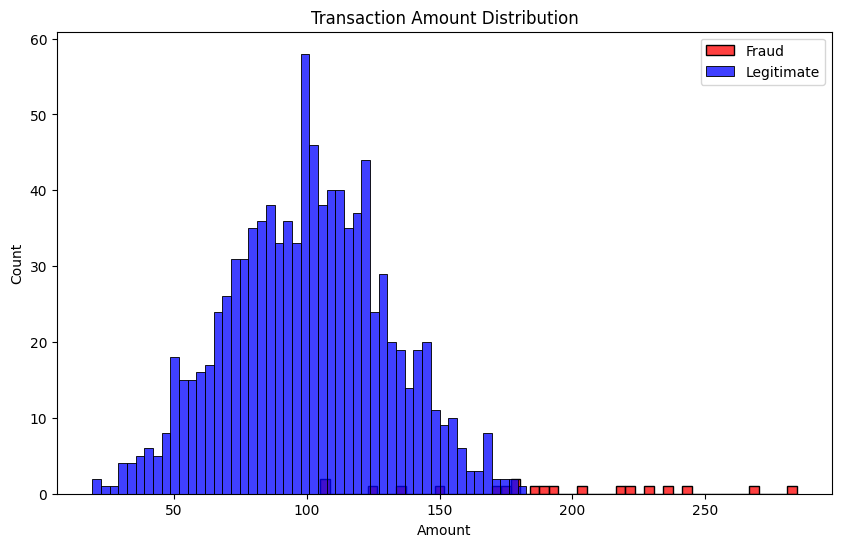

In [15]:
# Visualize transaction amounts for fraud and legitimate transactions
plt.figure(figsize=(10, 6))
sns.histplot(data[data['IsFraud'] == 1]['Amount'], bins=50, color='red', label='Fraud')
sns.histplot(data[data['IsFraud'] == 0]['Amount'], bins=50, color='blue', label='Legitimate')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.legend()
plt.show()

We discover that: 
- Most transactions are not fraudulent.
- The dataset does not represent large expense amounts. The largest fraudulent amount is approximately 280 USD.
- A pattern of fraudulent transactions, as none of them are below or at 100 USD. Overlapping amounts exist between approximately 110-175 USD.
- All transactions over approximately 175 USD are fraudulent. 

### Machine Learning Model:
We will:
- Split the dataset into training and testing sets.
- Train a simple machine learning model - Logistic Regression on the training data.
- Evaluate the model's performance using accuracy, precision, recall, and F1-score.

In [24]:
# Split the dataset into features and labels
X = data[['Amount']]  
y = data['IsFraud'] 

- X contains the feature(s) that we are using for analysis
- y contains the label that we will analyze

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- We are training on 80% of the dataset which will be stored in X-train and y_train)
- We will use 20% of the unseen data to evaluate our model. This data is stored in X-test and y_test

In [26]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

- 'model = LogisticRegression()' creates an instance of a logistic regression model. Logistic regression is a type of supervised machine learning algorithm used for binary classification problems, where you want to predict one of two possible classes (e.g., yes/no, true/false, 1/0).
- 'model.fit(X_train, y_train)' trains the logistic regression model using the training data. In this case, X_train represents the feature matrix (independent variables: Amount), and y_train represents the target variable (labels: IsFraud). The fit method adjusts the model's parameters to make predictions based on the provided training data.
- 'y_pred = model.predict(X_test)' makes predictions on a separate dataset, which is the testing set. X_test is the feature matrix, and y_pred is a variable that stores the predicted labels for the testing data. The logistic regression model uses the learned parameters to make predictions on new, unseen data.

### Fraud Detection Results:

Report the model's accuracy and fraud detection metrics.
Analyze the performance of the model.

In [27]:
# Fraud Detection Results
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Model Accuracy: 99.50%
Precision: 1.00
Recall: 0.75
F1-Score: 0.86


- Model Accuracy is reported as 99.5%. This means that the model correctly predicted 99.5% of the instances in the dataset. This high accuracy rate suggests that the model is making accurate predictions.
- A precision of 1.00 means that every prediction the model made as positive was correct. This is an excellent precision score and indicates that the model is good at not falsely labeling negative instances as positive.
- The recall score of 0.75 suggests that the model correctly identified 75% of all actual positive instances.
- An F1 score of 0.86 indicates that the model is effective at making positive predictions while also correctly identifying a substantial proportion of actual positive instances. 

### Summary 

In this case study Case Study 1: Fraud Detection," we delve into the approach to using data analytics for detecting and preventing fraudulent activities. The key steps and components of their strategy are as follows:

- **Data collection**: We begin by gathering transaction data, including the Amount that customers spend and the column IsFraud that tells us if the transaction is fraud or not (1= fraud, 0=legitimate).

- **Data exploration and preprocessing**: To ensure data accuracy and consistency, we checked for missing values.  Also, we tried to explore the features, the distribution of data, and data visualization to uncover patterns and anomalies that could serve as potential indicators of fraud.

- **Machine learning model development**: Our Logistic regression model, that trained on historical data to make them proficient in learning from past fraudulent activities and distinguishing them from legitimate transactions.

- **Results and business impact: The results of this approach are impressive. Fraud detection rates significantly increase, while false positives decrease. 

Conclusion: This case study demonstrates the power of data analytics in fraud detection. By employing meticulous data collection, cleaning, and analysis, coupled with the implementation of machine learning models and continuous improvement, JPMorgan Chase effectively safeguards their customers and the financial ecosystem.

Future Challenges: JPMorgan Chase acknowledges that fraudsters continue to evolve, and they remain committed to staying ahead of the curve. They emphasize the importance of harnessing the power of data analytics to ensure their fraud detection systems remain vigilant in protecting their customers and financial integrity.

In conclusion, this case study at JPMorgan Chase serves as an inspiring example of how data analytics can be leveraged effectively to combat fraud. It underscores the importance of data in safeguarding financial institutions and encourages others to explore the potential of data analytics in their own endeavors.




